AIM: Extract FASTQ files for read mapping (Part 1/3, ASAH ANALYSIS PIPELINE)

This experiment studies the effect of ASAH, or Hepatic specific acid ceramidase, on mice whose livers have been exposed to EtOH. 
We expect to see ASAH- transgenic mice suffer ALD (alcoholic liver disease) while ASAH+ transgenic mice generate tolerance to the alcohol exposure and hence have an overall higher baseline for gene expression.

Details:
PUBMED link: https://www.ncbi.nlm.nih.gov/pubmed/32398264
GSE link: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE139015

I have taken 2 replicates for this analysis, I will do the following exercise one replicate after another

Replicate assessed in this ipynb notebook: <br />
Replicate 4 <br />
    GSM4126813	Liver, t-_dox_EtOH (rep 4) <br />
    GSM4126822	Liver, T+_dox_EtOH (rep 4) <br />
    <br />
Replicate 3 <br />
    GSM4126812	Liver, t-_dox_EtOH (rep 3) <br />
    GSM4126821	Liver, T+_dox_EtOH (rep 3) <br />

<center> |----------|-----------|------------| </center>

# Replicate 4

In [24]:
#Make a folder to conduct the analysis 
#-p to not make a duplicate directory
mkdir -p /mnt/storage/$USER/jupyternotebooks/ASAH_analysis
cd /mnt/storage/$USER/jupyternotebooks/ASAH_analysis

In [25]:
#Verify directory
pwd

/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis


# Fetch FASTQ data for transgene- and transgene+ murine models into their respective subfolders

In [26]:
cd /mnt/storage/r0768685/jupyternotebooks/ASAH_analysis
mkdir -p replicate4/
cd replicate4

In [21]:
#FETCH "transgene- Etoh-dox" LIVER TISSUE RNASEQ FASTQ DATA
mkdir -p "t-Etoh-dox"
fastq-dump --split-files SRR10300056 -O t-Etoh-dox/

Rejected 15411860 READS because READLEN < 1
Read 15411860 spots for SRR10300056
Written 15411860 spots for SRR10300056


In [22]:
#FETCH "transgene+ Etoh-dox" LIVER TISSUE RNASEQ FASTQ DATA
mkdir -p "t+Etoh-dox"
fastq-dump --split-files SRR10300074 -O t+Etoh-dox/

2020-10-29T10:28:58 fastq-dump.2.9.6 sys: timeout exhausted while reading file within network system module - mbedtls_ssl_read returned -76 ( NET - Reading information from the socket failed )
2020-10-29T10:30:02 fastq-dump.2.9.6 sys: timeout exhausted while reading file within network system module - mbedtls_ssl_read returned -76 ( NET - Reading information from the socket failed )
Rejected 9895740 READS because READLEN < 1
Read 9895740 spots for SRR10300074
Written 9895740 spots for SRR10300074


In [23]:
#See all the files in transgenic- mice
ls t-Etoh-dox -lt

total 4261084
-rw-r--r-- 1 r0768685 domain users 4363347548 Oct 29 11:23 SRR10300056_1.fastq


In [24]:
#See all the files in transgenic+ mice
ls t+Etoh-dox -lt

total 2720856
-rw-r--r-- 1 r0768685 domain users 2786154264 Oct 29 11:44 SRR10300074_1.fastq


<center> |----------|-----------|------------| </center>

# Verify number of reads in both conditions

In [74]:
#Store local variables that contain 
let "num_t_minus = $(($(wc -l t-Etoh-dox/SRR10300056_1.fastq | cut -d ' ' -f1)/4))"
let "num_t_plus = $(($(wc -l t+Etoh-dox/SRR10300074_1.fastq | cut -d ' ' -f1)/4))"

#Check actual number of reads from website as given below
#For transgenic- (https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR10300056)
let "actual_t_minus = 15411860"
#For transgenic+ (https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR10300074)
let "actual_t_plus = 9895740"

#Check equality
if [ $num_t_minus -eq $actual_t_minus ]; then
    echo "Transgenic- mice are correctly downloaded, number of reads = " $actual_t_minus
else
    echo "ERROR: Transgenic- mice: actual_t_minus = " $actual_t_minus " while downloaded = " $num_t_minus
fi
if [ $num_t_plus -eq $actual_t_plus ]; then
    echo "Transgenic+ mice are correctly downloaded, number of reads = " $actual_t_plus
else
    echo "ERROR: Transgenic+ mice: actual_t_plus = " $actual_t_plus " while downloaded = " $num_t_plus
fi


Transgenic- mice are correctly downloaded, number of reads =  15411860
Transgenic+ mice are correctly downloaded, number of reads =  9895740


<center> |----------|-----------|------------| </center>

# Assess read quality using FASTQC

In [75]:
mkdir -p fastqc_results/
#For transgenic- mice
/usr/bin/fastqc t-Etoh-dox/SRR10300056_1.fastq -o fastqc_results
#For transgenic+ mice
/usr/bin/fastqc t+Etoh-dox/SRR10300074_1.fastq -o fastqc_results


Started analysis of SRR10300056_1.fastq
Approx 5% complete for SRR10300056_1.fastq
Approx 10% complete for SRR10300056_1.fastq
Approx 15% complete for SRR10300056_1.fastq
Approx 20% complete for SRR10300056_1.fastq
Approx 25% complete for SRR10300056_1.fastq
Approx 30% complete for SRR10300056_1.fastq
Approx 35% complete for SRR10300056_1.fastq
Approx 40% complete for SRR10300056_1.fastq
Approx 45% complete for SRR10300056_1.fastq
Approx 50% complete for SRR10300056_1.fastq
Approx 55% complete for SRR10300056_1.fastq
Approx 60% complete for SRR10300056_1.fastq
Approx 65% complete for SRR10300056_1.fastq
Approx 70% complete for SRR10300056_1.fastq
Approx 75% complete for SRR10300056_1.fastq
Approx 80% complete for SRR10300056_1.fastq
Approx 85% complete for SRR10300056_1.fastq
Approx 90% complete for SRR10300056_1.fastq
Approx 95% complete for SRR10300056_1.fastq
Analysis complete for SRR10300056_1.fastq
Started analysis of SRR10300074_1.fastq
Approx 5% complete for SRR10300074_1.fastq


**Discussing the quality of reads with screenshots of FASTQC tool**

## <center>Left: transgenic- (SRR10300056) --- Right: transgenic+ (SRR10300074)</center>


**Basic statistics** 

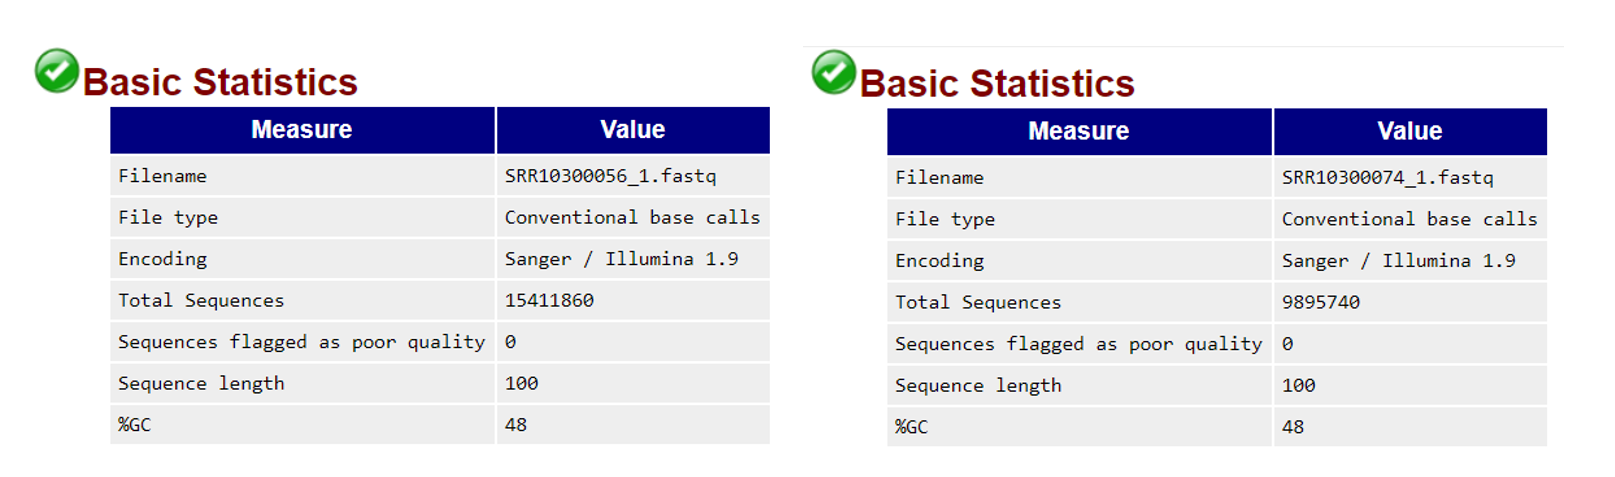

These Illumina reads have 100 bases as sequence length, which is as expected and GC content at 48%, which is very similar to the theoretical expected mean GC content

**Per base sequence quality** 


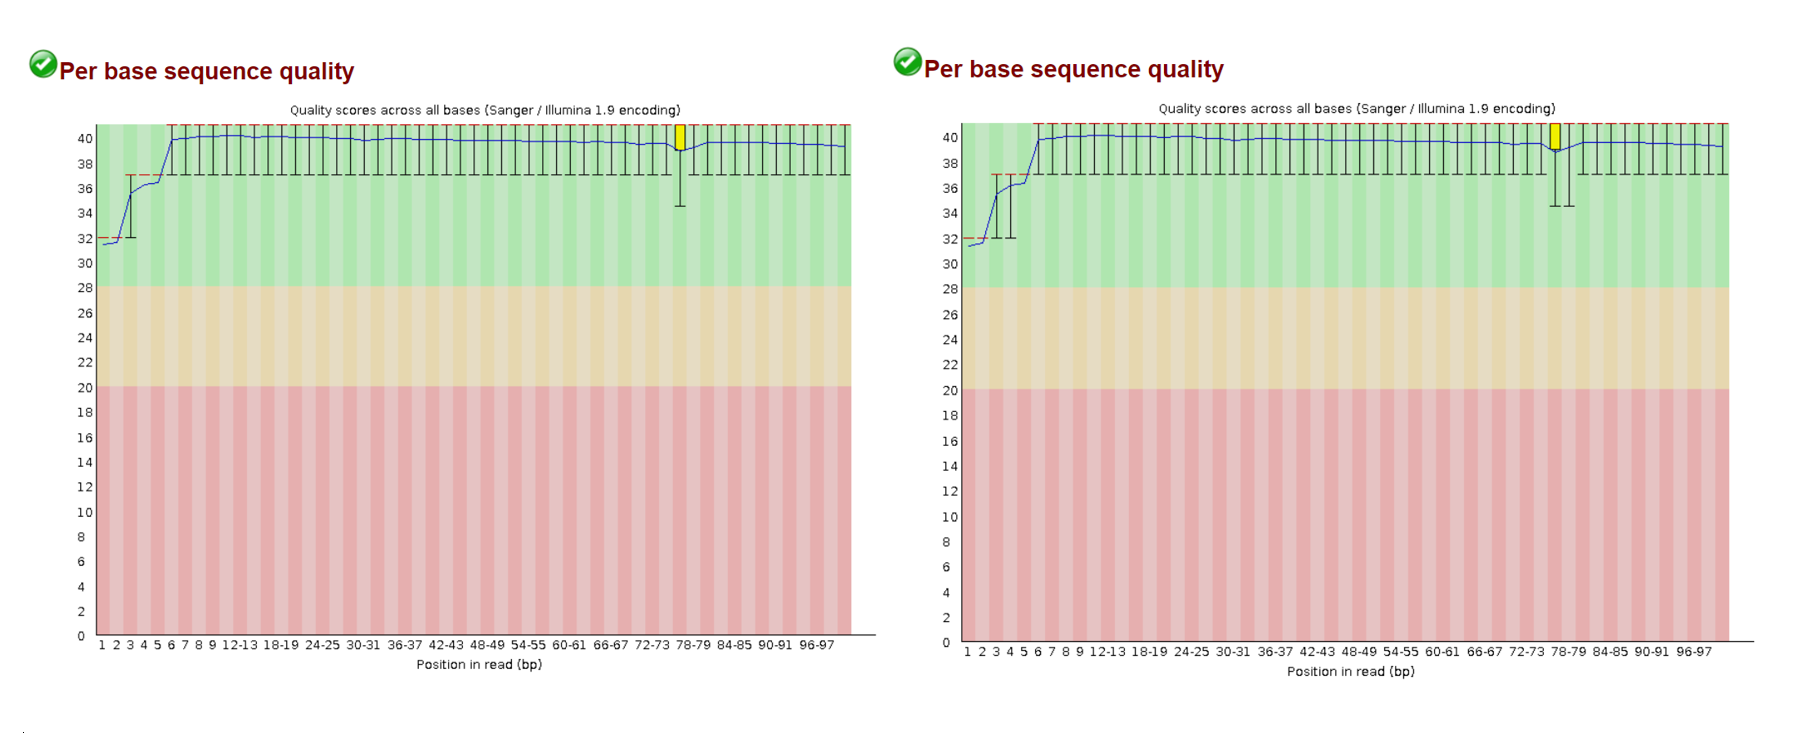

We can see the blue colored median line for these Illumina reads lies in the green range, which is a good sign of high quality reads.

**Per base sequence content** 

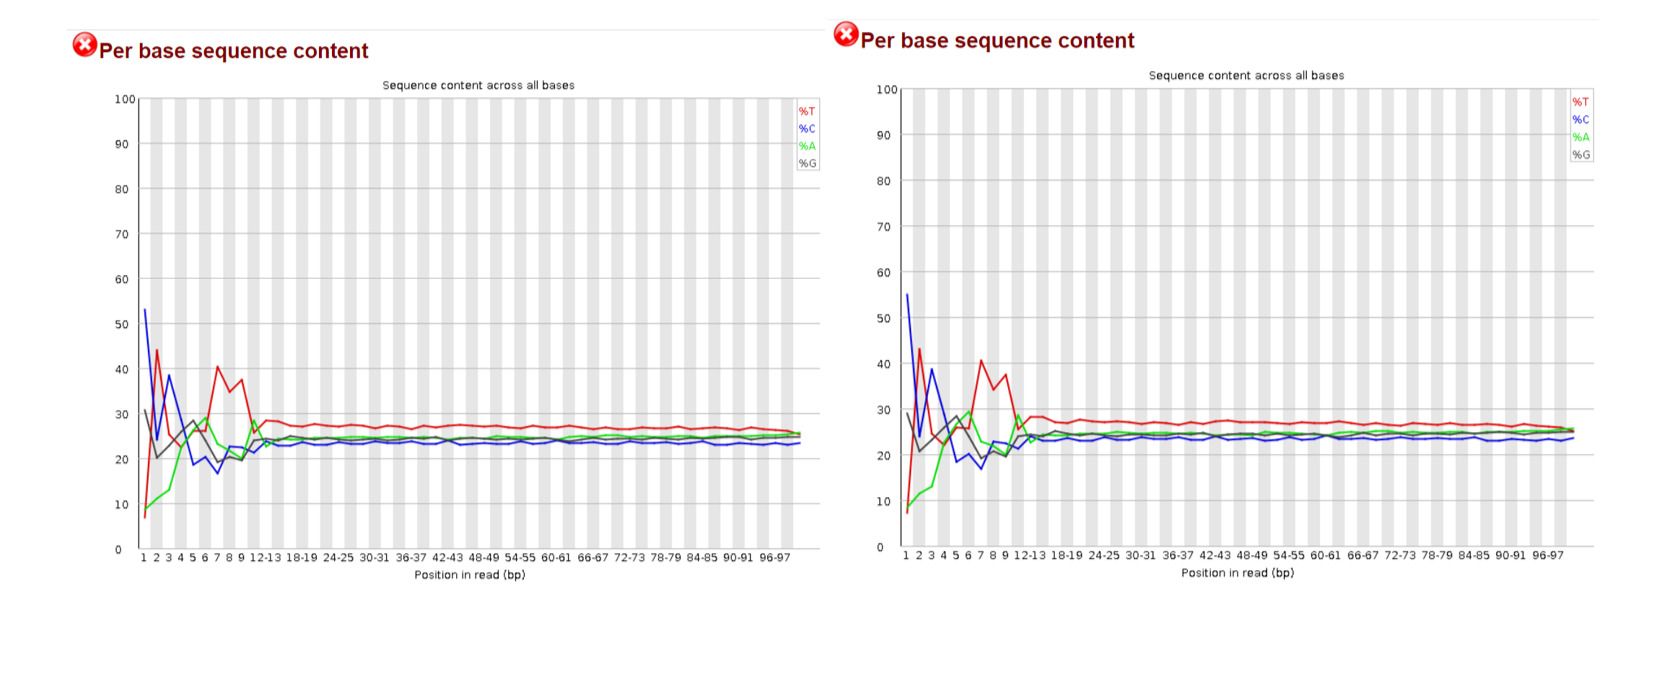

The individual curves of the bases show some disturbance in the beginning but eventually stabilize in both murine models, which is a normal behaviour for RNAseq libraries

**Per base N content** = 0 (both models)
**Over-represented sequences** = None (both models)


in conclusion, these files are high quality FASTQ files.

# Mapping FASTQ files with STAR

In [7]:
#Check STAR directory of mouse reference genome
ls /mnt/storage/data/reference_genomes/mm10/STAR

chrLength.txt      exonInfo.tab          SAindex
chrNameLength.txt  geneInfo.tab          sjdbInfo.txt
chrName.txt        Genome                sjdbList.fromGTF.out.tab
chrStart.txt       genomeParameters.txt  sjdbList.out.tab
exonGeTrInfo.tab   SA                    transcriptInfo.tab


In [3]:
#Store both model files in particular folder
mkdir -p STAR_stuff

In [8]:
#For transgenic- model

STAR --genomeDir /mnt/storage/data/reference_genomes/mm10/STAR \
     --genomeLoad NoSharedMemory  \
     --runThreadN 8 \
     --readFilesIn t-Etoh-dox/SRR10300056_1.fastq \
     --outFileNamePrefix STAR_stuff/transgenic_minus.

Nov 03 17:32:44 ..... started STAR run
Nov 03 17:32:44 ..... loading genome
Nov 03 17:33:45 ..... started mapping
Nov 03 17:34:54 ..... finished successfully


In [13]:
head STAR_stuff/transgenic_minus.Aligned.out.sam

@HD	VN:1.4
@SQ	SN:chr1	LN:195471971
@SQ	SN:chr2	LN:182113224
@SQ	SN:chr3	LN:160039680
@SQ	SN:chr4	LN:156508116
@SQ	SN:chr5	LN:151834684
@SQ	SN:chr6	LN:149736546
@SQ	SN:chr7	LN:145441459
@SQ	SN:chr8	LN:129401213
@SQ	SN:chr9	LN:124595110


In [9]:
#For transgenic+ model

STAR --genomeDir /mnt/storage/data/reference_genomes/mm10/STAR \
     --genomeLoad NoSharedMemory  \
     --runThreadN 8 \
     --readFilesIn t+Etoh-dox/SRR10300074_1.fastq \
     --outFileNamePrefix STAR_stuff/transgenic_plus.

Nov 03 17:34:55 ..... started STAR run
Nov 03 17:34:55 ..... loading genome
Nov 03 17:35:10 ..... started mapping
Nov 03 17:36:02 ..... finished successfully


In [12]:
head STAR_stuff/transgenic_plus.Aligned.out.sam

@HD	VN:1.4
@SQ	SN:chr1	LN:195471971
@SQ	SN:chr2	LN:182113224
@SQ	SN:chr3	LN:160039680
@SQ	SN:chr4	LN:156508116
@SQ	SN:chr5	LN:151834684
@SQ	SN:chr6	LN:149736546
@SQ	SN:chr7	LN:145441459
@SQ	SN:chr8	LN:129401213
@SQ	SN:chr9	LN:124595110


Compress SAM file to BAM and sort for easy data manipulation later

In [ ]:
cd STAR_stuff
samtools sort -o transgenic_plus.bam transgenic_plus.Aligned.out.sam
samtools sort -o transgenic_minus.bam transgenic_minus.Aligned.out.sam

[bam_sort_core] merging from 3 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


Indexing BAM files for fast read processing for further analysis

In [ ]:
#These commands ran to completion when notebook was offline
samtools index transgenic_plus.bam
samtools index transgenic_minus.bam

In [19]:
samtools view transgenic_plus.bam | head -3

SRR10300074.9867849	256	chr1	3179646	0	1S99M	*	0	0	GCCCAGAAGCTGGAAAGAACCCAGATGCCCCTCAACAGAGGAATGGATACAGAAAATGTGGTACATCTACACAATGGAGTACTACTCAGCTATTAAAAAG	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	NH:i:8	HI:i:5	AS:i:97	nM:i:0
SRR10300074.7818670	272	chr1	3345328	0	100M	*	0	0	CATGATGATGGTAGAGGACATCAAGAAGGACCTTAATAAATCACTTAAAGAAATAAAGGAGAACACTGCTAAAGAGTTACAAGTCATTAAAGAAAAACAG	JJJJJFJFFFJFJJJJFJFFFAJFJJF<FF--JJJJJJJJAFJJJJJJJFJJFF7-JJJJJJJJFJJJFJJJJFJJJJJJJJFAA-JJJJJJJJJFAFAA	NH:i:9	HI:i:2	AS:i:94	nM:i:2
SRR10300074.4642790	0	chr1	3421853	255	49M1233N51M	*	0	0	CTCCCCACTCTGCCGGCTCCGGATACCTAAGTATATTGTGTGCAAATACGTGACAGGCCTAGAAACCTGGACACAATCCCGAGGTGAAAAGTTCACGGAA	AAFFFJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ	NH:i:1	HI:i:1	AS:i:97	nM:i:0
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


In [20]:
#Display number of reads mapped per chromosome
samtools idxstats transgenic_plus.bam

chr1	195471971	999030	0
chr2	182113224	629096	0
chr3	160039680	492060	0
chr4	156508116	624016	0
chr5	151834684	1450013	0
chr6	149736546	443950	0
chr7	145441459	638562	0
chr8	129401213	373105	0
chr9	124595110	599776	0
chr10	130694993	364271	0
chr11	122082543	519110	0
chr12	120129022	738024	0
chr13	120421639	288241	0
chr14	124902244	350005	0
chr15	104043685	351888	0
chr16	98207768	323895	0
chr17	94987271	444959	0
chr18	90702639	243187	0
chr19	61431566	412440	0
chrX	171031299	157678	0
chrY	91744698	2439	0
chrM	16299	899012	0
chr1_GL456210_random	169725	52	0
chr1_GL456211_random	241735	68	0
chr1_GL456212_random	153618	62	0
chr1_GL456213_random	39340	28	0
chr1_GL456221_random	206961	87	0
chr4_GL456216_random	66673	45	0
chr4_GL456350_random	227966	61	0
chr4_JH584292_random	14945	0	0
chr4_JH584293_random	207968	61	0
chr4_JH584294_random	191905	76	0
chr4_JH584295_random	1976	2	0
chr5_GL456354_random	195993	2	0
chr5_JH584296_random	199368	191	0
chr5_JH584297_random	205776	140	0
chr5_JH584298_ra

In [21]:
samtools idxstats transgenic_minus.bam

chr1	195471971	1527699	0
chr2	182113224	964942	0
chr3	160039680	772339	0
chr4	156508116	1124534	0
chr5	151834684	2128320	0
chr6	149736546	755242	0
chr7	145441459	1047163	0
chr8	129401213	578433	0
chr9	124595110	1013341	0
chr10	130694993	536132	0
chr11	122082543	807232	0
chr12	120129022	1261386	0
chr13	120421639	382886	0
chr14	124902244	508326	0
chr15	104043685	556848	0
chr16	98207768	530049	0
chr17	94987271	690150	0
chr18	90702639	361772	0
chr19	61431566	581710	0
chrX	171031299	245891	0
chrY	91744698	5888	0
chrM	16299	1373989	0
chr1_GL456210_random	169725	104	0
chr1_GL456211_random	241735	119	0
chr1_GL456212_random	153618	138	0
chr1_GL456213_random	39340	122	0
chr1_GL456221_random	206961	198	0
chr4_GL456216_random	66673	84	0
chr4_GL456350_random	227966	100	0
chr4_JH584292_random	14945	0	0
chr4_JH584293_random	207968	105	0
chr4_JH584294_random	191905	134	0
chr4_JH584295_random	1976	5	0
chr5_GL456354_random	195993	0	0
chr5_JH584296_random	199368	298	0
chr5_JH584297_random	205776	234	0
ch

# Reads to gene counts (just for practice, actual gene counts calculated in Replicate 3 [bottom of this notebook]

NOTE: Running the following featureCounts here just to check the code <br />actual file that is used for R work is generated below after replicate 3 is also mapped

In [30]:
#For transgenic+ model
featureCounts \
        -Q 30 \
        -g gene_name \
        -a /mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf \
        -o gene_t_plus.counts \
        transgenic_plus.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S transgenic_plus.bam                            ||
||                                                                            ||
||             Output file : gene_t_plus.counts                               ||
||                 Summary : gene_t_plus.counts.summary          

In [35]:
#For transgenic- model
featureCounts \
        -Q 30 \
        -g gene_name \
        -a /mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf \
        -o gene_t_minus.counts \
        transgenic_minus.bam 


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           S transgenic_minus.bam                           ||
||                                                                            ||
||             Output file : gene_t_minus.counts                              ||
||                 Summary : gene_t_minus.counts.summary         

In [34]:
head gene_t_plus.counts -n 5

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "30" "-g" "gene_name" "-a" "/mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf" "-o" "gene_t_plus.counts" "transgenic_plus.bam" 
Geneid	Chr	Start	End	Strand	Length	transgenic_plus.bam
Gm16088	chr1	3054233	3054733	+	501	0
Gm26206	chr1	3102016	3102125	+	110	0
Xkr4	chr1;chr1;chr1;chr1;chr1;chr1;chr1	3205901;3206523;3213439;3213609;3214482;3421702;3670552	3207317;3207317;3215632;3216344;3216968;3421901;3671498	-;-;-;-;-;-;-	6094	1


In [36]:
head gene_t_minus.counts -n 5

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "30" "-g" "gene_name" "-a" "/mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf" "-o" "gene_t_minus.counts" "transgenic_minus.bam" 
Geneid	Chr	Start	End	Strand	Length	transgenic_minus.bam
Gm16088	chr1	3054233	3054733	+	501	0
Gm26206	chr1	3102016	3102125	+	110	0
Xkr4	chr1;chr1;chr1;chr1;chr1;chr1;chr1	3205901;3206523;3213439;3213609;3214482;3421702;3670552	3207317;3207317;3215632;3216344;3216968;3421901;3671498	-;-;-;-;-;-;-	6094	0


In [41]:
#Separate Gene name and count for both files
cut -f1,7 gene_t_plus.counts  > counts_t_plus.txt
cut -f1,7 gene_t_minus.counts > counts_t_minus.txt

In [44]:
grep 'Xkr4' counts_t_plus.txt

Xkr4	1


In [45]:
grep 'Xkr4' counts_t_minus.txt

Xkr4	0


# Replicate 3

In [27]:
cd /mnt/storage/r0768685/jupyternotebooks/ASAH_analysis
mkdir -p replicate3/
cd replicate3

FETCH FILES

In [22]:
#FETCH "transgene- Etoh-dox" LIVER TISSUE RNASEQ FASTQ DATA
mkdir -p "t-Etoh-dox"
fastq-dump --split-files SRR10300054 -O t-Etoh-dox/

Rejected 13874028 READS because READLEN < 1
Read 13874028 spots for SRR10300054
Written 13874028 spots for SRR10300054


In [16]:
#FETCH "transgene+ Etoh-dox" LIVER TISSUE RNASEQ FASTQ DATA
mkdir -p "t+Etoh-dox"
fastq-dump --split-files SRR10300072 -O t+Etoh-dox/

2020-11-19T02:46:06 fastq-dump.2.9.6 sys: timeout exhausted while reading file within network system module - mbedtls_ssl_read returned -76 ( NET - Reading information from the socket failed )
Rejected 12256844 READS because READLEN < 1
Read 12256844 spots for SRR10300072
Written 12256844 spots for SRR10300072


VERIFY NUMBER OF READS

In [28]:
#Store local variables that contain 
let "num_t_minus = $(($(wc -l t-Etoh-dox/SRR10300054_1.fastq | cut -d ' ' -f1)/4))"
let "num_t_plus = $(($(wc -l t+Etoh-dox/SRR10300072_1.fastq | cut -d ' ' -f1)/4))"

#Check actual number of reads from website as given below
#For transgenic- (https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR10300054)
let "actual_t_minus = 13874028"
#For transgenic+ (https://trace.ncbi.nlm.nih.gov/Traces/sra/?run=SRR10300072)
let "actual_t_plus = 12256844"

#Check equality
if [ $num_t_minus -eq $actual_t_minus ]; then
    echo "Transgenic- mice are correctly downloaded, number of reads = " $actual_t_minus
else
    echo "ERROR: Transgenic- mice: actual_t_minus = " $actual_t_minus " while downloaded = " $num_t_minus
fi
if [ $num_t_plus -eq $actual_t_plus ]; then
    echo "Transgenic+ mice are correctly downloaded, number of reads = " $actual_t_plus
else
    echo "ERROR: Transgenic+ mice: actual_t_plus = " $actual_t_plus " while downloaded = " $num_t_plus
fi


Transgenic- mice are correctly downloaded, number of reads =  13874028
Transgenic+ mice are correctly downloaded, number of reads =  12256844


ASSESS QUALITY WITH FASTQC

In [29]:
mkdir -p fastqc_results/
#For transgenic- mice
/usr/bin/fastqc t-Etoh-dox/SRR10300054_1.fastq -o fastqc_results
#For transgenic+ mice
/usr/bin/fastqc t+Etoh-dox/SRR10300072_1.fastq -o fastqc_results


Started analysis of SRR10300054_1.fastq
Approx 5% complete for SRR10300054_1.fastq
Approx 10% complete for SRR10300054_1.fastq
Approx 15% complete for SRR10300054_1.fastq
Approx 20% complete for SRR10300054_1.fastq
Approx 25% complete for SRR10300054_1.fastq
Approx 30% complete for SRR10300054_1.fastq
Approx 35% complete for SRR10300054_1.fastq
Approx 40% complete for SRR10300054_1.fastq
Approx 45% complete for SRR10300054_1.fastq
Approx 50% complete for SRR10300054_1.fastq
Approx 55% complete for SRR10300054_1.fastq
Approx 60% complete for SRR10300054_1.fastq
Approx 65% complete for SRR10300054_1.fastq
Approx 70% complete for SRR10300054_1.fastq
Approx 75% complete for SRR10300054_1.fastq
Approx 80% complete for SRR10300054_1.fastq
Approx 85% complete for SRR10300054_1.fastq
Approx 90% complete for SRR10300054_1.fastq
Approx 95% complete for SRR10300054_1.fastq
Analysis complete for SRR10300054_1.fastq
Started analysis of SRR10300072_1.fastq
Approx 5% complete for SRR10300072_1.fastq


DISCUSS QUALITY

## <center>Left: transgenic- (SRR10300054) --- Right: transgenic+ (SRR10300072)</center>


**Basic statistics** 

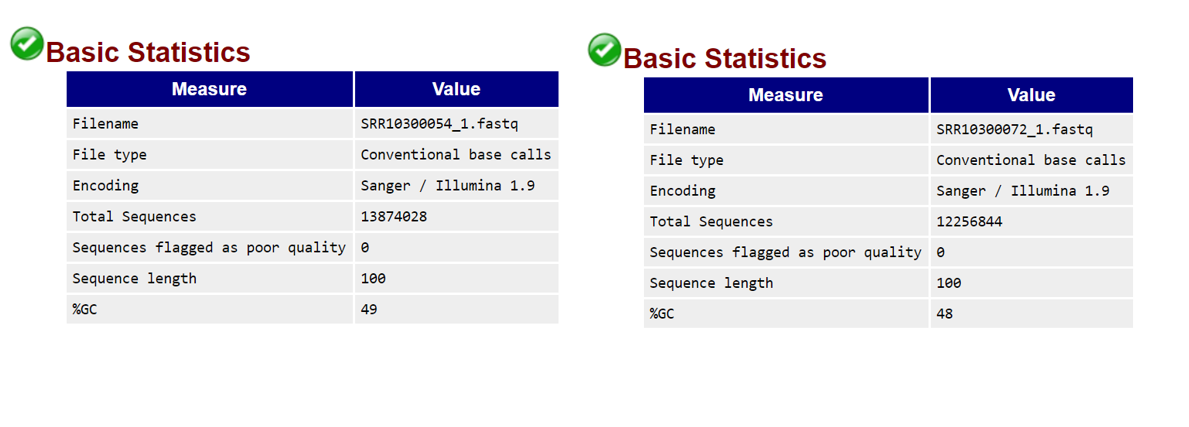

**Per base sequence quality** 

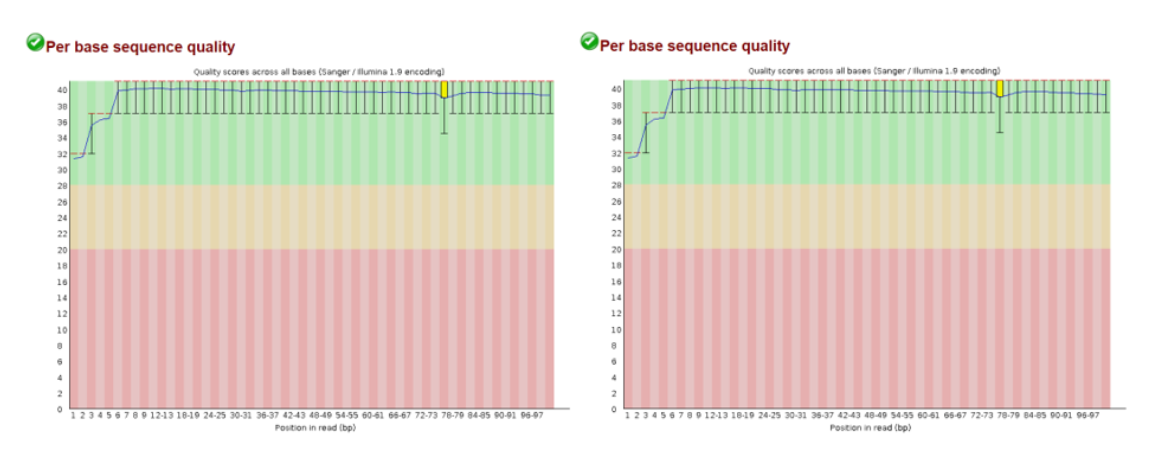

**Per base sequence content** 

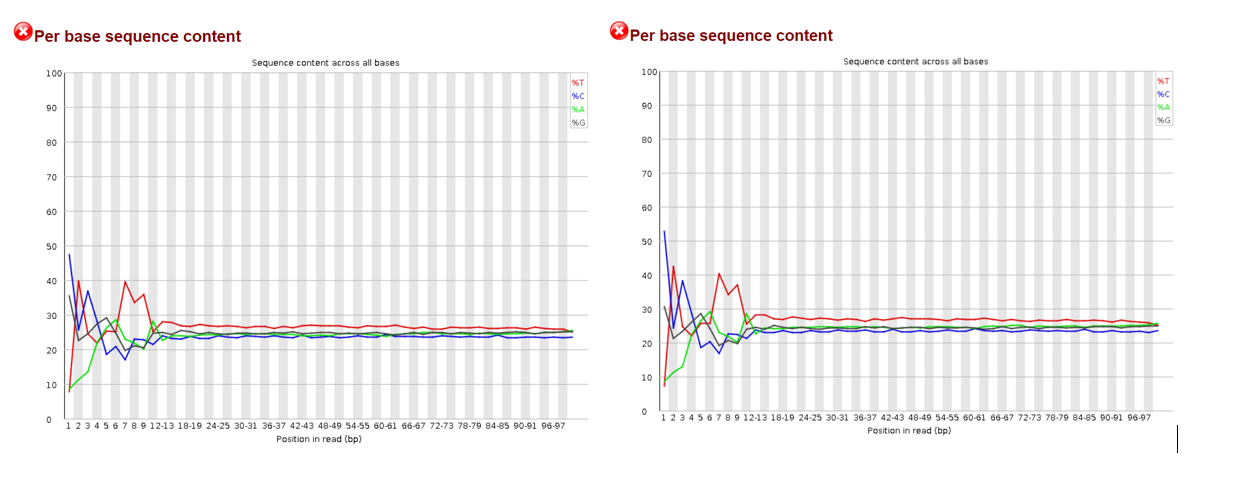

**Per base N content** = 0 (both models)
**Over-represented sequences** = None (both models) <br />
So in conclusion, both files are high quality FASTQ files


MAP WITH STAR

In [31]:
#Store both model files in particular folder
mkdir -p STAR_stuff

In [33]:
#For transgenic- model

STAR --genomeDir /mnt/storage/data/reference_genomes/mm10/STAR \
     --genomeLoad NoSharedMemory  \
     --runThreadN 8 \
     --readFilesIn t-Etoh-dox/SRR10300054_1.fastq \
     --outFileNamePrefix STAR_stuff/transgenic_minus.

Nov 19 13:06:32 ..... started STAR run
Nov 19 13:06:32 ..... loading genome
Nov 19 13:07:35 ..... started mapping
Nov 19 13:08:30 ..... finished successfully


In [34]:
#For transgenic+ model

STAR --genomeDir /mnt/storage/data/reference_genomes/mm10/STAR \
     --genomeLoad NoSharedMemory  \
     --runThreadN 8 \
     --readFilesIn t+Etoh-dox/SRR10300072_1.fastq \
     --outFileNamePrefix STAR_stuff/transgenic_plus.

Nov 19 13:08:31 ..... started STAR run
Nov 19 13:08:31 ..... loading genome
Nov 19 13:08:49 ..... started mapping
Nov 19 13:09:44 ..... finished successfully


COMPRESS TO BAM

In [35]:
cd STAR_stuff
samtools sort -o transgenic_plus.bam transgenic_plus.Aligned.out.sam
samtools sort -o transgenic_minus.bam transgenic_minus.Aligned.out.sam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


READS TO GENE COUNTS

In [51]:
#For both replicates
featureCounts \
        -Q 30 \
        -g gene_name \
        -a /mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf \
        -o gene_all.counts \
        transgenic_plus.bam /mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_plus.bam transgenic_minus.bam /mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_minus.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 4 BAM files                                      ||
||                           S transgenic_plus.bam                            ||
||                           S /mnt/storage/r0768685/jupyternotebooks/ASA ... ||
||                           S transgenic_minus.bam                           ||
||                           S /mnt/storage/r0768685/jupyternoteb

In [56]:
ls *count*

gene_all.counts  gene_all.counts.summary


In [54]:
head gene_all.counts

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "30" "-g" "gene_name" "-a" "/mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf" "-o" "gene_all.counts" "transgenic_plus.bam" "/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_plus.bam" "transgenic_minus.bam" "/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_minus.bam" 
Geneid	Chr	Start	End	Strand	Length	transgenic_plus.bam	/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_plus.bam	transgenic_minus.bam	/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_minus.bam
Gm16088	chr1	3054233	3054733	+	501	0	0	0	0
Gm26206	chr1	3102016	3102125	+	110	0	0	0	0
Xkr4	chr1;chr1;chr1;chr1;chr1;chr1;chr1	3205901;3206523;3213439;3213609;3214482;3421702;3670552	3207317;3207317;3215632;3216344;3216968;3421901;3671498	-;-;-;-;-;-;-	6094	0	1	0	0
Gm1992	chr1;chr1	3466587;3513405	3466687;3

In [52]:
cut -f-6 gene_all.counts > all.genedata.tsv

In [53]:
head all.genedata.tsv

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "30" "-g" "gene_name" "-a" "/mnt/storage/data/reference_genomes/mm10/Mus_musculus.GRCm38.76.chr.gtf" "-o" "gene_all.counts" "transgenic_plus.bam" "/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_plus.bam" "transgenic_minus.bam" "/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate4/STAR_stuff/transgenic_minus.bam" 
Geneid	Chr	Start	End	Strand	Length
Gm16088	chr1	3054233	3054733	+	501
Gm26206	chr1	3102016	3102125	+	110
Xkr4	chr1;chr1;chr1;chr1;chr1;chr1;chr1	3205901;3206523;3213439;3213609;3214482;3421702;3670552	3207317;3207317;3215632;3216344;3216968;3421901;3671498	-;-;-;-;-;-;-	6094
Gm1992	chr1;chr1	3466587;3513405	3466687;3513553	+;+	250
Gm27396	chr1	3783876	3783933	-	58
Rp1	chr1;chr1;chr1;chr1	4343507;4351910;4352202;4360200	4350091;4352081;4352837;4360314	-;-;-;-	7508
Sox17	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	4490928;4491713;4493100;4493100;4493772;4493772;4495136

In [58]:
grep "Sox17" all.genedata.tsv

Sox17	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	4490928;4491713;4493100;4493100;4493772;4493772;4495136;4496291;4496291	4492668;4492668;4493490;4493466;4493863;4493863;4495942;4496413;4496363	-;-;-;-;-;-;-;-;-	3154


In [89]:
cut -f1,7- gene_all.counts | grep -v '^#' > all.gene.counts

In [60]:
grep "Sox17" all.gene.counts

Sox17	12	7	6	10


In [81]:
grep "Sod1" all.gene.counts

Sod1	4744	3433	5806	6958
